# Faragó Facundo - Gustavo Doctorovich

# *Importar librerias y dataset*

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
import WholeBrain.Observables.FC as FC
import WholeBrain.Observables.swFCD as swFCD
import WholeBrain.Observables.phFCD as phFCD
import WholeBrain.Observables.GBC as GBC
import os


# Cambio constante de la libreria para que no descarte datos
phFCD.discardOffset = 0

# Ruta al archivo de texto con los datos de los sujetos 25x25
ruta_archivo_25 = 'Datos/Datasets/StructuralConnectivity/netmats2_25.txt'

# Ruta al archivo de texto con los datos de los sujetos 200x200
ruta_archivo_200 = 'Datos/Datasets/StructuralConnectivity/netmats2_200.txt'

# Ruta al archivo de texto con los time series
ruta_archivo_ts = 'Datos/Datasets/fMRI/100206.txt'

# Cargar los datos de los sujetos desde los archivos de texto
datos_sujetos_25 = np.loadtxt(ruta_archivo_25)
datos_sujetos_200 = np.loadtxt(ruta_archivo_200)

# Reshape para crear matriz 3D 
matrices_por_sujeto_25 = datos_sujetos_25.reshape((1003, 25, 25))
matrices_por_sujeto_200 = datos_sujetos_200.reshape((1003, 200, 200))

# Calcular la matriz de conectividad promedio de todos los sujetos
matriz_conectividad_promedio = np.mean(matrices_por_sujeto_25, axis=0)
matriz_conectividad_promedio = matriz_conectividad_promedio/matriz_conectividad_promedio.max()
matriz_conectividad_promedio = matriz_conectividad_promedio*0.1

# Cargar los datos timeseries de los sujetos desde el archivo de texto
datos_ts = np.loadtxt(ruta_archivo_ts)

# Reshape para crear una matriz 2D (4800, 25)
matriz_z = datos_ts.reshape((4800, 25))
matriz_ts = matriz_z[:1200, :]
matriz_tsT = matriz_ts.T

Going to use Functional Connectivity (FC)...
Going to use Sliding Windows Functional Connectivity Dynamics (swFCD)...
Going to use Phase-Interaction Matrix...
Going to use Phase Functional Connectivity Dynamics (phFCD)...
Going to use Global Brain Connectivity (GBC)...


In [4]:
# Establecer la diagonal en ceros
np.fill_diagonal(matriz_conectividad_promedio, 0)

# *Resultados*

## Sin WholeBrain

### Matriz de conectividad

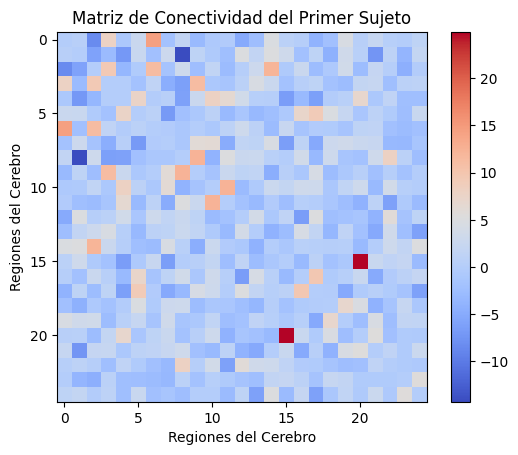

In [2]:
# Seleccionar una sola matriz de conectividad (por ejemplo, la primera)
matriz_conectividad_individual = matrices_por_sujeto_25[0]

# Crear la visualización de la matriz de conectividad individual
plt.imshow(matriz_conectividad_individual, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad del Primer Sujeto')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### Matriz promedio de matrices de conectividad

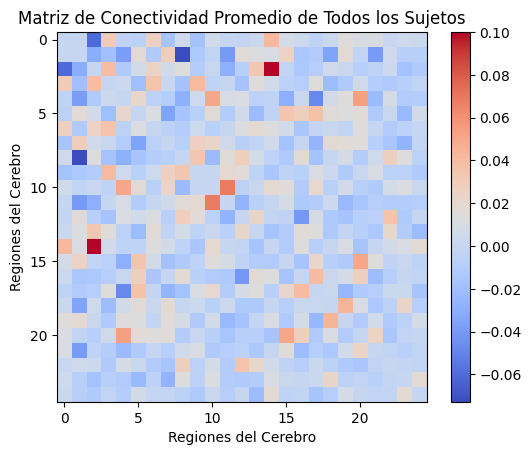

In [3]:
# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### fRMI

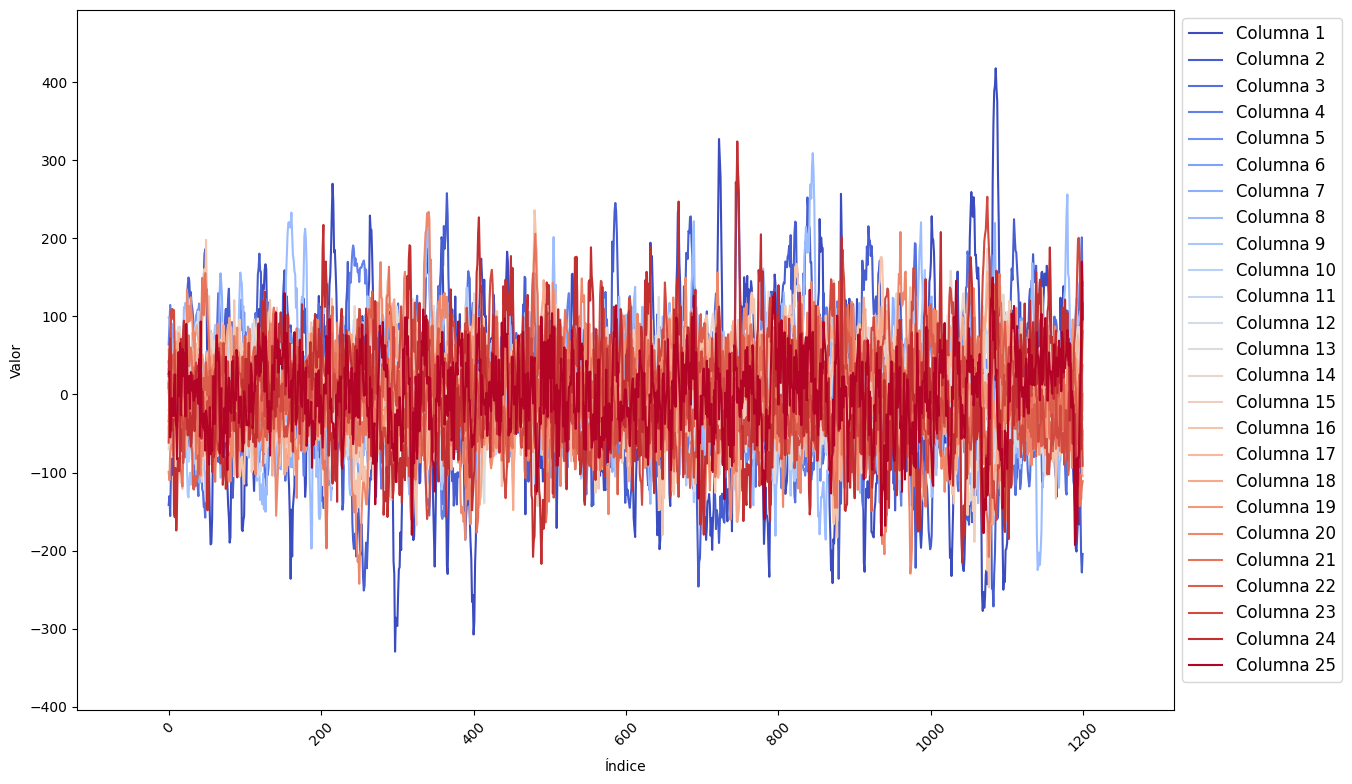

In [4]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico con un tamaño más grande
plt.figure(figsize=(12, 8))

# Obtener el número de columnas y generar colores únicos para cada una de las regiones
num_columnas = matrizrp_detrended.shape[1]
colores = plt.cm.coolwarm(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto cada región
for i in range(num_columnas):
    plt.plot(matrizrp_detrended[:, i], color=colores[i], label=f'Columna {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el tamaño de la fuente
plt.rcParams['font.size'] = 12

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mejorar la disposición del gráfico
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar los márgenes del gráfico
plt.margins(x=0.1, y=0.1)

# Mostrar el gráfico
plt.show()

### Correlacion (fMRI)

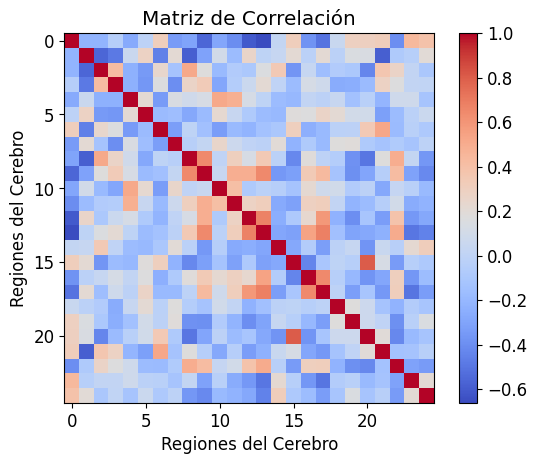

In [5]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

matriz_correlacion = np.corrcoef(matrizrp_detrended, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()


## Con WholeBrain

### Functional Connectivity

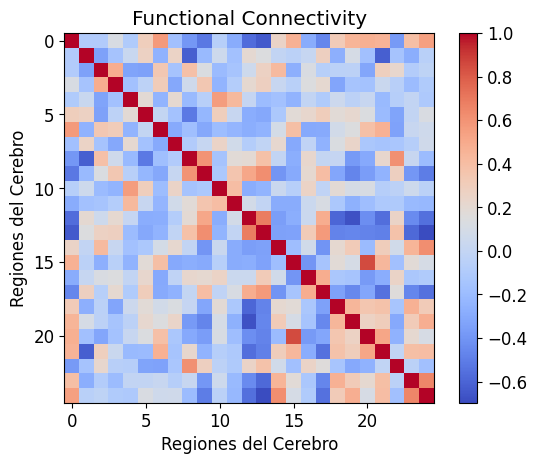

In [6]:
FC_mt = FC.from_fMRI(matriz_tsT, True, True)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(FC_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Functional Connectivity')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### Sliding Window FCD


In [9]:
sw_FCD = swFCD.from_fMRI(matriz_tsT,True,True)
sw_FCD_mt = swFCD.buildFullMatrix(sw_FCD)  

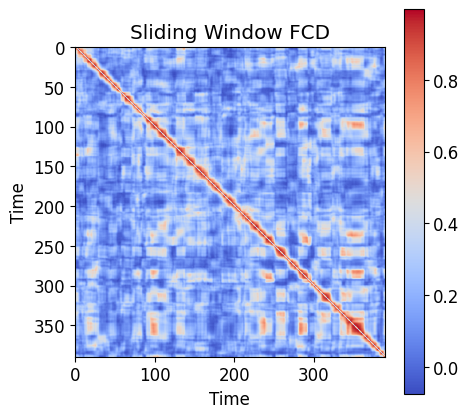

In [10]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(sw_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Sliding Window FCD')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show() 

### Phase Interaction Matrix

In [11]:
ph_FCD = phFCD.from_fMRI(matriz_tsT,True,True)
ph_FCD_mt = phFCD.buildFullMatrix(ph_FCD)             

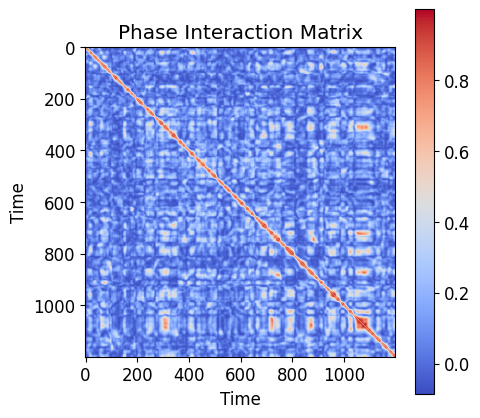

In [12]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(ph_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Phase Interaction Matrix')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show()   

### Global Brain Connectivity

In [7]:
FCD_mt = GBC.from_fMRI(matriz_tsT,True,True)
GBC_mt = GBC.postprocess(FCD_mt) 

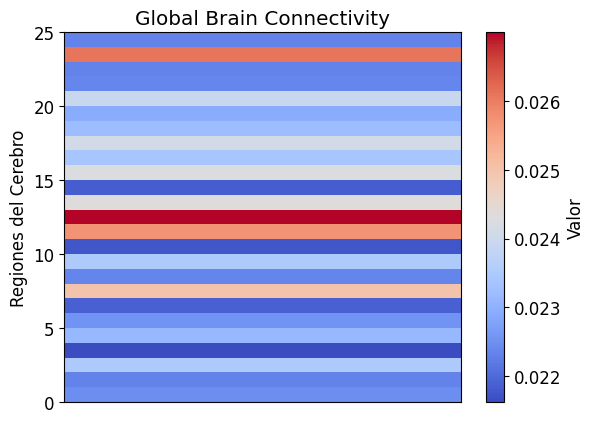

In [8]:
# Reformatear el vector a una matriz de una columna (25x1)
matriz = GBC_mt.reshape((25, 1))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Mostrar la matriz como imagen
im = ax.imshow(matriz, cmap='coolwarm', aspect='auto', extent=[0, 1, 0, 25])

# Añadir una barra de color
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Valor')

# Ajustar las etiquetas del eje x
ax.set_xticks([])  # Desactivar las etiquetas del eje x

# Añadir etiquetas y título
plt.ylabel('Regiones del Cerebro')
plt.title('Global Brain Connectivity')

# Mostrar la visualización
plt.show()

### Figura DMF

#### Deco

##### 25x25

=    simulating E-E (no FIC)         =


100%|██████████| 111/111 [00:44<00:00,  2.49it/s]


=    simulating FIC                  =
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.05.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.1.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.15.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.2.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.25.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.3.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.35.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.4.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.45.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.5.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.55.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.6.txt !!!
Loading

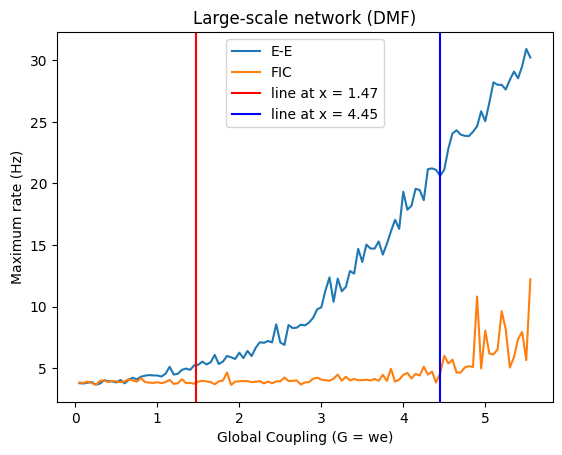

In [3]:
import Tests.Deco_Optim1 as fig_Deco

# Carpeta destino
folder_path = 'Datos/Results/Results_25x25'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes=6, wEnd=5.5+0.01)

##### 200x200

In [ ]:
import Tests.Deco_Optim1 as fig_Deco

# Carpeta destino
folder_path = 'Datos/Results/Results_200x200'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes=6)

#### Herzog

##### 25x25

=    simulating E-E (no FIC)         =


100%|██████████| 120/120 [03:29<00:00,  1.74s/it]


=    simulating FIC                  =
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.05.txt
Balancing for we=0.05
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.1.txt
Balancing for we=0.1
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.15.txt
Balancing for we=0.15000000000000002
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.2.txt
Balancing for we=0.2
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.25.txt
Balancing for we=0.25
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.3.txt
Balancing for we=0.3
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.35.txt
Balancing for we=0.35000000000000003
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.4.txt
Balancing for we=0.4
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.45.txt
Balancing for we=0.45
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.5.txt
Ba

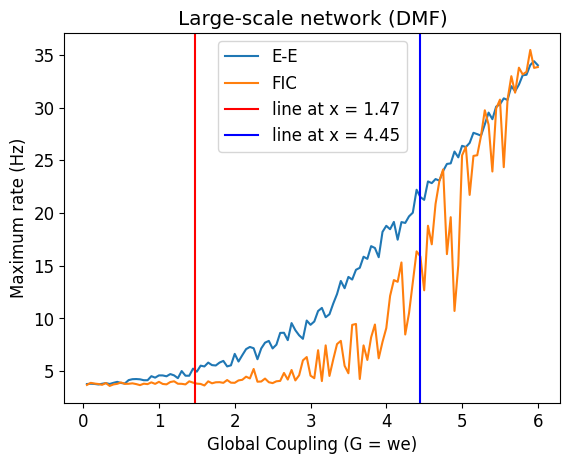

In [15]:
import Tests.Herzog as fig_Herzog

# Carpeta destino
folder_path = 'Datos/Results/Results_Herzog'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes= 4)

##### Datos Gus

=    simulating E-E (no FIC)         =


100%|██████████| 120/120 [01:31<00:00,  1.31it/s]


=    simulating FIC                  =
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.05.txt
Balancing for we=0.05
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.1.txt
Balancing for we=0.1
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.15.txt
Balancing for we=0.15000000000000002
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.2.txt
Balancing for we=0.2
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.25.txt
Balancing for we=0.25
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.3.txt
Balancing for we=0.3
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.35.txt
Balancing for we=0.35000000000000003
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.4.txt
Balancing for we=0.4
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.45.txt
Balancing for we=0.45
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.5.txt
Balancing fo

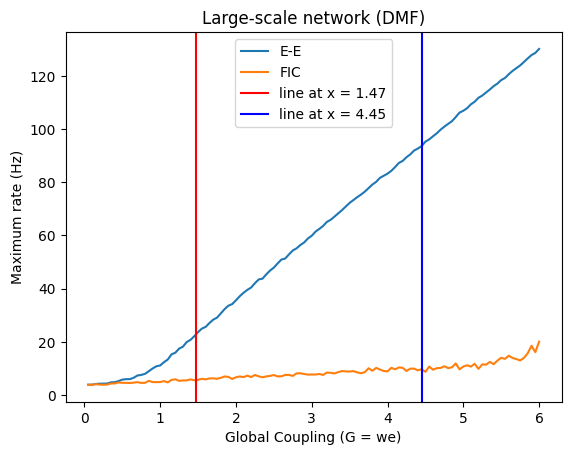

In [7]:
import Tests.Herzog as fig_Herzog
import scipy.io as sio

# Cargo SC
SC = sio.loadmat('Datos/Datasets/StructuralConnectivity/Human_66.mat')

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(SC['C'], fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes= 4)

#### Naskar

=    simulating Naskar               =

Processing: 0.05  maxRateFIC => 2.9447849291051402

Processing: 0.1  maxRateFIC => 2.9485595638304636

Processing: 0.15000000000000002  maxRateFIC => 2.945382169195073

Processing: 0.2  maxRateFIC => 2.9485695656575546

Processing: 0.25  maxRateFIC => 2.9490587029462048

Processing: 0.3  maxRateFIC => 2.947912068347132

Processing: 0.35000000000000003  maxRateFIC => 2.9473923961412063

Processing: 0.4  maxRateFIC => 2.947112318815868

Processing: 0.45  maxRateFIC => 2.949426855404927

Processing: 0.5  maxRateFIC => 2.948388663778025

Processing: 0.55  maxRateFIC => 2.948217292888765

Processing: 0.6000000000000001  maxRateFIC => 2.9474593121067483

Processing: 0.6500000000000001  maxRateFIC => 2.95122122452491

Processing: 0.7000000000000001  maxRateFIC => 2.9482372939060535

Processing: 0.7500000000000001  maxRateFIC => 2.948209782595136

Processing: 0.8  maxRateFIC => 2.9515641774568726

Processing: 0.8500000000000001  maxRateFIC => 2.950952178

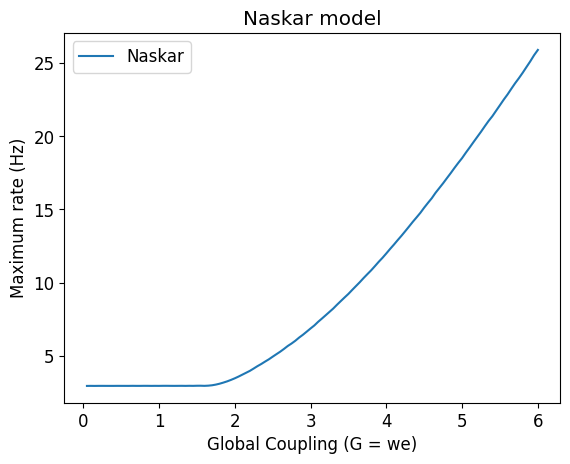

In [14]:
import Tests.Fig_Naskar as fig_Naskar

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Naskar.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'))

#### Naskar - Deco - Herzog

In [ ]:
##################### Deco
import Tests.Deco_Optim1 as fig_Deco

# Carpeta destino
folder_path1 = 'Datos/Results/Results_25x25'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path1, 'results_{}.txt'), wEnd = 4.8)


##################### Naskar
import Tests.Fig_Naskar as fig_Naskar

# Carpeta destino
folder_path2 = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Naskar.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path2, 'results_{}.txt'), wEnd = 4.8)


##################### Herzog
import Tests.Herzog as fig_Herzog

# Carpeta destino
folder_path3 = 'Datos/Results/Results_Herzog'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path3, 'results_{}.txt'), wEnd = 4.8)

plt.show()

In [13]:
import Tests.NDH as fig_NDH

# Carpeta destino
folder_path_h = 'Datos/Results/Results_Herzog'
folder_path_d = 'Datos/Results/Results_25x25'

# Calculo DMF
fig_NDH.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName_H=os.path.join(folder_path_h, 'results_{}.txt'), fileName_D=os.path.join(folder_path_d, 'results_{}.txt'), wEnd = 1+0.01)

plt.show()

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler-Maruyama Integrator...
Going to use the Balanced J9 (FIC) mechanism in DecoEtAl2014...
Going to use the Balanced J (FIC) mechanism in HerzogEtAl2022...
Going to use the Balanced J9 (FIC) mechanism...
=    simulating Naskar               =

Processing: 0.05  maxRateFIC => 2.948048206424858

Processing: 0.1  maxRateFIC => 2.9470954797399305

Processing: 0.15000000000000002  maxRateFIC => 2.9479022554585925

Processing: 0.2  maxRateFIC => 2.9485762570431997

Processing: 0.25  maxRateFIC => 2.948767487090997

Processing: 0.3  maxRateFIC => 2.947012355217697

Processing: 0.35000000000000003  maxRateFIC => 2.948445814686285

Processing: 0.4  maxRateFIC => 2.9468198077616576

Processing: 0.45  maxRateFIC => 2.945030851603698

Processing: 0.5  maxRateFIC => 2.947618386278189

Processing: 0.55  maxRateFIC => 2.9521062953349904

Processing: 0.600000000000

SystemError: CPUDispatcher(<function integrationStep at 0x000001FEC94A4180>) returned a result with an exception set